In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# 기본 데이터 확인

In [2]:
df_2023 = pd.read_csv("./data/tmdb_2023.csv")
df_2023.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,3ão: An Endless Story,2023-12-11,movie,150.0,NaN,NaN,"Family, Adventure",Luís Felipe,"Victor Rodrigues, Thiago Gabriel, Ana Júlia, A...",BR,pt,VC Produções,This movie is a gift for the 2023 ESCA high sc...,3ão,8.375,4
1,My Fault,2023-06-08,movie,117.0,NaN,NaN,"Romance, Drama",Domingo González,"Nicole Wallace, Gabriel Guevara, Marta Hazas, ...",ES,es,"Pokeepsie Films, Amazon Studios","Noah must leave her city, boyfriend, and frien...","first time, forbidden love, stepbrother, femal...",7.800,3711
2,Brave Citizen,2023-10-25,movie,112.0,NaN,NaN,"Action, Drama, Comedy",Park Jin-pyo,"Shin Hye-sun, Lee Jun-young, Park Jung-woo, Pa...",KR,ko,"Studio N, Oscar 10 Studio, Vol Media","An expelled boxing champion, who now is a high...","secret identity, female fighter, female teache...",6.900,46
3,The Haunting at Saint Joseph's,2023-02-26,movie,100.0,NaN,NaN,"Horror, Thriller",Jon Cohen,"Tim Spriggs, Melissa Brattoni, Brandon Krum, D...",AU,en,NaN,"An engaged Muslim doctor, her fiancé, and thei...",NaN,4.500,12
4,Mobil Goyang,2023-04-24,movie,41.0,NaN,NaN,"Drama, Romance",Tomeng,"Virly Virginia, Uri Angelo, Radja Adipati",HN,ka,"Kelas Bintang, Karya Bintang Bersama",NaN,NaN,0.000,0


In [7]:
df_2020.sort_values(by='title', ascending=True).head(10)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
19,#Alive,2020-06-24,movie,98.0,NaN,NaN,"Action, Horror",Cho Il,"Yoo Ah-in, Park Shin-hye, Lee Hyun-wook, Jin S...",KR,ko,"Lotte Entertainment, Zip Cinema, Perspective P...","As a grisly virus rampages a city, a lone man ...","escape, alone, survival, drone, zombie, apartm...",7.225,1892
11576,#CoupleChallenge – Das beste Team gewinnt,2020-12-08,tv,60.0,4.0,36.0,Reality,NaN,NaN,NaN,de,NaN,NaN,NaN,7.500,2
11352,#FreeRayshawn,2020-04-13,tv,10.0,1.0,15.0,"Drama, Crime",NaN,"Stephan James, Laurence Fishburne, Jasmine Cep...",US,en,"Sony Pictures Television, Fuqua Films",Iraq war veteran Rayshawn takes shelter in his...,NaN,7.200,13
1756,#FriendButMarried 2,2020-02-27,movie,104.0,NaN,NaN,"Drama, Comedy, Romance",Rako Prijanto,"Adipati Dolken, Mawar Eva De Jongh, Vonny Corn...",ID,id,Falcon Pictures,As Ayu and Ditto finally transition from best ...,NaN,6.200,9
13743,#HASHTALK,2020-01-06,tv,3.0,4.0,27.0,NaN,NaN,"Cho Mi-yeon, Minnie, Jeon So-yeon, Song Yuqi, ...",KR,ko,NaN,A mini series focused on the behind the scenes...,NaN,0.000,0
1015,#HandballStrive,2020-07-24,movie,108.0,NaN,NaN,"Comedy, Drama",Daigo Matsui,"Seishirou Katou, Kotaro Daigo, Aju Makita, Har...",JP,ja,"Grasshoppa!, ColorBird",The school’s handball club is about to close d...,"sports, handball, social media, viral video, t...",7.000,2
1040,#Iamhere,2020-02-05,movie,100.0,NaN,NaN,"Comedy, Romance",Eric Lartigau,"Alain Chabat, Bae Doona, Jules Sagot, Ilian Be...",FR,fr,"Rectangle Productions, Gaumont, France 2 Ciném...",Stéphane lives a quiet life as an eminent Fren...,"korean, seoul, south korea",5.562,210
13920,#Influencers: The Series,2020-11-18,tv,NaN,1.0,9.0,Drama,NaN,"Chollo Sotiangco, Leon Eustaquio, Denjo Jose, ...",NaN,en,NaN,"Rooted from the harsh society, and the indiffe...",NaN,1.000,1
18122,#JURIFUL_DAYS,2020-08-15,tv,NaN,2.0,16.0,NaN,NaN,NaN,NaN,en,NaN,Vlog series following Juri of kpop group Rocke...,NaN,1.000,1
10819,#Luimelia,2020-02-14,tv,30.0,4.0,29.0,"Comedy, Drama",NaN,"Carol Rovira, Paula Usero, Lucía Martín Abello...",ES,es,Atresmedia,A spin-off of Love in Difficult Times that foc...,NaN,5.700,16


In [3]:
df_2023.isnull().sum()

title                     0
release_date              0
type                      0
runtime                7876
season_count          10000
episode_count         10000
genre                  3042
director               7833
cast                   4081
country                  32
language                  0
production_company     7299
synopsis               4868
tags                  15753
imdb_rating               0
imdb_review_count         0
dtype: int64

# 2. 전처리 전처리_type

In [4]:
df_2023[df_2023['season_count'].isna() & df_2023['episode_count'].isna()].head(5)

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,3ão: An Endless Story,2023-12-11,movie,150.0,NaN,NaN,"Family, Adventure",Luís Felipe,"Victor Rodrigues, Thiago Gabriel, Ana Júlia, A...",BR,pt,VC Produções,This movie is a gift for the 2023 ESCA high sc...,3ão,8.375,4
1,My Fault,2023-06-08,movie,117.0,NaN,NaN,"Romance, Drama",Domingo González,"Nicole Wallace, Gabriel Guevara, Marta Hazas, ...",ES,es,"Pokeepsie Films, Amazon Studios","Noah must leave her city, boyfriend, and frien...","first time, forbidden love, stepbrother, femal...",7.800,3711
2,Brave Citizen,2023-10-25,movie,112.0,NaN,NaN,"Action, Drama, Comedy",Park Jin-pyo,"Shin Hye-sun, Lee Jun-young, Park Jung-woo, Pa...",KR,ko,"Studio N, Oscar 10 Studio, Vol Media","An expelled boxing champion, who now is a high...","secret identity, female fighter, female teache...",6.900,46
3,The Haunting at Saint Joseph's,2023-02-26,movie,100.0,NaN,NaN,"Horror, Thriller",Jon Cohen,"Tim Spriggs, Melissa Brattoni, Brandon Krum, D...",AU,en,NaN,"An engaged Muslim doctor, her fiancé, and thei...",NaN,4.500,12
4,Mobil Goyang,2023-04-24,movie,41.0,NaN,NaN,"Drama, Romance",Tomeng,"Virly Virginia, Uri Angelo, Radja Adipati",HN,ka,"Kelas Bintang, Karya Bintang Bersama",NaN,NaN,0.000,0


In [6]:
df_2023[df_2023['season_count'].isna() & df_2023['episode_count'].isna()].shape

(10000, 16)

In [7]:
df_2023['type'].value_counts(dropna=False)

type
movie    10000
tv       10000
Name: count, dtype: int64

In [8]:
print(df_2023[df_2023['type'] == 'movie']['season_count'].value_counts(dropna=False))
print(df_2023[df_2023['type'] == 'movie']['episode_count'].value_counts(dropna=False))

season_count
NaN    10000
Name: count, dtype: int64
episode_count
NaN    10000
Name: count, dtype: int64


In [9]:
print(df_2023[df_2023['type'] == 'tv']['season_count'].value_counts(dropna=False))

season_count
1.0     8496
2.0     1086
3.0      309
4.0       45
5.0       24
7.0        9
6.0        9
10.0       5
11.0       4
8.0        4
16.0       4
9.0        2
12.0       1
30.0       1
15.0       1
Name: count, dtype: int64


In [10]:
print(df_2023[df_2023['type'] == 'tv']['episode_count'].value_counts(dropna=False))

episode_count
1.0      1569
6.0       915
8.0       878
4.0       684
10.0      601
         ... 
219.0       1
225.0       1
280.0       1
278.0       1
166.0       1
Name: count, Length: 206, dtype: int64


In [11]:
df_2023_1 = df_2023

In [13]:
# movie인 경우 season/episode count가 NaN이면 1로 채움
df_2023_1.loc[df_2023_1['type'] == 'movie', ['season_count', 'episode_count']] = df_2023_1.loc[df_2023_1['type'] == 'movie', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2023_1.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,3ão: An Endless Story,2023-12-11,movie,150.0,1.0,1.0,"Family, Adventure",Luís Felipe,"Victor Rodrigues, Thiago Gabriel, Ana Júlia, A...",BR,pt,VC Produções,This movie is a gift for the 2023 ESCA high sc...,3ão,8.375,4
1,My Fault,2023-06-08,movie,117.0,1.0,1.0,"Romance, Drama",Domingo González,"Nicole Wallace, Gabriel Guevara, Marta Hazas, ...",ES,es,"Pokeepsie Films, Amazon Studios","Noah must leave her city, boyfriend, and frien...","first time, forbidden love, stepbrother, femal...",7.800,3711
2,Brave Citizen,2023-10-25,movie,112.0,1.0,1.0,"Action, Drama, Comedy",Park Jin-pyo,"Shin Hye-sun, Lee Jun-young, Park Jung-woo, Pa...",KR,ko,"Studio N, Oscar 10 Studio, Vol Media","An expelled boxing champion, who now is a high...","secret identity, female fighter, female teache...",6.900,46
3,The Haunting at Saint Joseph's,2023-02-26,movie,100.0,1.0,1.0,"Horror, Thriller",Jon Cohen,"Tim Spriggs, Melissa Brattoni, Brandon Krum, D...",AU,en,NaN,"An engaged Muslim doctor, her fiancé, and thei...",NaN,4.500,12
4,Mobil Goyang,2023-04-24,movie,41.0,1.0,1.0,"Drama, Romance",Tomeng,"Virly Virginia, Uri Angelo, Radja Adipati",HN,ka,"Kelas Bintang, Karya Bintang Bersama",NaN,NaN,0.000,0


In [14]:
df_2023[(df_2023['type'] == 'tv') & (df_2023['season_count'].isna() | df_2023['episode_count'].isna())]
#df_2020[(df_2020['type'] == 'movie') & (df_2020['season_count'].isna() | df_2020['episode_count'].isna())]

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count


In [15]:
print(df_2023_1[df_2023_1['season_count'] == 1.0]['episode_count'].value_counts(dropna=False))

episode_count
1.0      11537
6.0        872
8.0        821
4.0        666
10.0       563
         ...  
115.0        1
151.0        1
55.0         1
117.0        1
64.0         1
Name: count, Length: 160, dtype: int64


In [16]:
print(df_2023_1[df_2023_1['episode_count'] == 1.0]['season_count'].value_counts(dropna=False))

season_count
1.0     11537
2.0        19
3.0         9
4.0         2
16.0        1
10.0        1
Name: count, dtype: int64


In [17]:
df_2023_2 = df_2023_1
df_2023_2.loc[df_2023_2['type'] == 'tv', ['season_count', 'episode_count']] = df_2023_2.loc[df_2023_1['type'] == 'tv', ['season_count', 'episode_count']].fillna(1)
pd.set_option('display.max_columns', None)
df_2023_2.head()

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,3ão: An Endless Story,2023-12-11,movie,150.0,1.0,1.0,"Family, Adventure",Luís Felipe,"Victor Rodrigues, Thiago Gabriel, Ana Júlia, A...",BR,pt,VC Produções,This movie is a gift for the 2023 ESCA high sc...,3ão,8.375,4
1,My Fault,2023-06-08,movie,117.0,1.0,1.0,"Romance, Drama",Domingo González,"Nicole Wallace, Gabriel Guevara, Marta Hazas, ...",ES,es,"Pokeepsie Films, Amazon Studios","Noah must leave her city, boyfriend, and frien...","first time, forbidden love, stepbrother, femal...",7.800,3711
2,Brave Citizen,2023-10-25,movie,112.0,1.0,1.0,"Action, Drama, Comedy",Park Jin-pyo,"Shin Hye-sun, Lee Jun-young, Park Jung-woo, Pa...",KR,ko,"Studio N, Oscar 10 Studio, Vol Media","An expelled boxing champion, who now is a high...","secret identity, female fighter, female teache...",6.900,46
3,The Haunting at Saint Joseph's,2023-02-26,movie,100.0,1.0,1.0,"Horror, Thriller",Jon Cohen,"Tim Spriggs, Melissa Brattoni, Brandon Krum, D...",AU,en,NaN,"An engaged Muslim doctor, her fiancé, and thei...",NaN,4.500,12
4,Mobil Goyang,2023-04-24,movie,41.0,1.0,1.0,"Drama, Romance",Tomeng,"Virly Virginia, Uri Angelo, Radja Adipati",HN,ka,"Kelas Bintang, Karya Bintang Bersama",NaN,NaN,0.000,0


# 2. 데이터 전처리_runtime

In [18]:
df_2023_2.isnull().sum()

title                     0
release_date              0
type                      0
runtime                7876
season_count              0
episode_count             0
genre                  3042
director               7833
cast                   4081
country                  32
language                  0
production_company     7299
synopsis               4868
tags                  15753
imdb_rating               0
imdb_review_count         0
dtype: int64

In [19]:
df_2023_2.shape

(20000, 16)

In [20]:
df_2023_2[df_2023_2['runtime'].isna() & df_2023_2['genre'].isna() ].shape

(2412, 16)

## 2_2 runtime null 값 열 제거

In [21]:
df_2023_3 = df_2023_2

In [22]:
df_2023_3.dropna(subset=['runtime'], inplace=True)

In [23]:
df_2023_3.shape

(12124, 16)

# 2. 데이터 전처리_pr

In [24]:
df_2023_4 = df_2023_3
df_2023_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,3ão: An Endless Story,2023-12-11,movie,150.0,1.0,1.0,"Family, Adventure",Luís Felipe,"Victor Rodrigues, Thiago Gabriel, Ana Júlia, A...",BR,pt,VC Produções,This movie is a gift for the 2023 ESCA high sc...,3ão,8.375,4
1,My Fault,2023-06-08,movie,117.0,1.0,1.0,"Romance, Drama",Domingo González,"Nicole Wallace, Gabriel Guevara, Marta Hazas, ...",ES,es,"Pokeepsie Films, Amazon Studios","Noah must leave her city, boyfriend, and frien...","first time, forbidden love, stepbrother, femal...",7.800,3711
2,Brave Citizen,2023-10-25,movie,112.0,1.0,1.0,"Action, Drama, Comedy",Park Jin-pyo,"Shin Hye-sun, Lee Jun-young, Park Jung-woo, Pa...",KR,ko,"Studio N, Oscar 10 Studio, Vol Media","An expelled boxing champion, who now is a high...","secret identity, female fighter, female teache...",6.900,46
3,The Haunting at Saint Joseph's,2023-02-26,movie,100.0,1.0,1.0,"Horror, Thriller",Jon Cohen,"Tim Spriggs, Melissa Brattoni, Brandon Krum, D...",AU,en,NaN,"An engaged Muslim doctor, her fiancé, and thei...",NaN,4.500,12
4,Mobil Goyang,2023-04-24,movie,41.0,1.0,1.0,"Drama, Romance",Tomeng,"Virly Virginia, Uri Angelo, Radja Adipati",HN,ka,"Kelas Bintang, Karya Bintang Bersama",NaN,NaN,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19902,El cor de l’avi,2023-12-26,tv,48.0,1.0,2.0,NaN,NaN,NaN,ES,ca,El Terrat,NaN,NaN,0.000,0
19909,"My Mom, Your Dad",2023-08-08,tv,90.0,1.0,8.0,NaN,NaN,NaN,DE,de,NaN,NaN,NaN,0.000,0
19910,光照临川,2023-09-08,tv,25.0,1.0,1.0,Documentary,NaN,NaN,CN,zh,NaN,NaN,NaN,7.000,1
19917,EVNNE [Target: ME] SPECIAL,2023-12-26,tv,30.0,1.0,1.0,NaN,NaN,NaN,JP,ja,Space Shower TV,A super talented group consisting of Japanese ...,NaN,0.000,0


In [25]:
df_2023_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12124 entries, 0 to 19937
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               12124 non-null  object 
 1   release_date        12124 non-null  object 
 2   type                12124 non-null  object 
 3   runtime             12124 non-null  float64
 4   season_count        12124 non-null  float64
 5   episode_count       12124 non-null  float64
 6   genre               11494 non-null  object 
 7   director            9913 non-null   object 
 8   cast                11062 non-null  object 
 9   country             12110 non-null  object 
 10  language            12124 non-null  object 
 11  production_company  9035 non-null   object 
 12  synopsis            11132 non-null  object 
 13  tags                3952 non-null   object 
 14  imdb_rating         12124 non-null  float64
 15  imdb_review_count   12124 non-null  int64  
dtypes: float6

### tags 관련 기본 문제 해결

1) synopsis, tags, genre가 모두 NaN인 데이터 모두 제거

In [26]:
# 1. 세기: synopsis, genre가 모두 NaN인 행 개수
nan_rows = df_2023_4[['synopsis', 'genre']].isna().all(axis=1)
count_nan_rows = nan_rows.sum()
print(f"synopsis, genre가 모두 NaN인 행 개수: {count_nan_rows}")

synopsis, genre가 모두 NaN인 행 개수: 123


In [30]:
# 2. 삭제: 그런 행 삭제
df_2023_4_cleaned = df_2023_4.loc[~nan_rows].copy()

In [27]:
df_2023_4 = df_2023_4.loc[~nan_rows].copy()
df_2023_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 19937
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               12001 non-null  object 
 1   release_date        12001 non-null  object 
 2   type                12001 non-null  object 
 3   runtime             12001 non-null  float64
 4   season_count        12001 non-null  float64
 5   episode_count       12001 non-null  float64
 6   genre               11494 non-null  object 
 7   director            9883 non-null   object 
 8   cast                10983 non-null  object 
 9   country             11987 non-null  object 
 10  language            12001 non-null  object 
 11  production_company  8975 non-null   object 
 12  synopsis            11132 non-null  object 
 13  tags                3950 non-null   object 
 14  imdb_rating         12001 non-null  float64
 15  imdb_review_count   12001 non-null  int64  
dtypes: float6

In [28]:
df_2023_4

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count
0,3ão: An Endless Story,2023-12-11,movie,150.0,1.0,1.0,"Family, Adventure",Luís Felipe,"Victor Rodrigues, Thiago Gabriel, Ana Júlia, A...",BR,pt,VC Produções,This movie is a gift for the 2023 ESCA high sc...,3ão,8.375,4
1,My Fault,2023-06-08,movie,117.0,1.0,1.0,"Romance, Drama",Domingo González,"Nicole Wallace, Gabriel Guevara, Marta Hazas, ...",ES,es,"Pokeepsie Films, Amazon Studios","Noah must leave her city, boyfriend, and frien...","first time, forbidden love, stepbrother, femal...",7.800,3711
2,Brave Citizen,2023-10-25,movie,112.0,1.0,1.0,"Action, Drama, Comedy",Park Jin-pyo,"Shin Hye-sun, Lee Jun-young, Park Jung-woo, Pa...",KR,ko,"Studio N, Oscar 10 Studio, Vol Media","An expelled boxing champion, who now is a high...","secret identity, female fighter, female teache...",6.900,46
3,The Haunting at Saint Joseph's,2023-02-26,movie,100.0,1.0,1.0,"Horror, Thriller",Jon Cohen,"Tim Spriggs, Melissa Brattoni, Brandon Krum, D...",AU,en,NaN,"An engaged Muslim doctor, her fiancé, and thei...",NaN,4.500,12
4,Mobil Goyang,2023-04-24,movie,41.0,1.0,1.0,"Drama, Romance",Tomeng,"Virly Virginia, Uri Angelo, Radja Adipati",HN,ka,"Kelas Bintang, Karya Bintang Bersama",NaN,NaN,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19833,少年剧有戏,2023-09-02,tv,25.0,1.0,1.0,Reality,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19834,无敌王婿,2023-09-06,tv,1.0,1.0,2.0,Drama,NaN,NaN,CN,zh,NaN,NaN,NaN,0.000,0
19910,光照临川,2023-09-08,tv,25.0,1.0,1.0,Documentary,NaN,NaN,CN,zh,NaN,NaN,NaN,7.000,1
19917,EVNNE [Target: ME] SPECIAL,2023-12-26,tv,30.0,1.0,1.0,NaN,NaN,NaN,JP,ja,Space Shower TV,A super talented group consisting of Japanese ...,NaN,0.000,0


## director와 cast가 모두 nan인 행 제거

In [29]:
nan_both = df_2023_4[(df_2023_4['director'].isna()) & (df_2023_4['cast'].isna())]
print(f"director와 cast 둘 다 NaN인 행 개수: {len(nan_both)}")

director와 cast 둘 다 NaN인 행 개수: 429


In [30]:
df_2023_4 = df_2023_4.dropna(subset=['director', 'cast'], how='all')

In [31]:
df_2023_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11572 entries, 0 to 19937
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11572 non-null  object 
 1   release_date        11572 non-null  object 
 2   type                11572 non-null  object 
 3   runtime             11572 non-null  float64
 4   season_count        11572 non-null  float64
 5   episode_count       11572 non-null  float64
 6   genre               11109 non-null  object 
 7   director            9883 non-null   object 
 8   cast                10983 non-null  object 
 9   country             11559 non-null  object 
 10  language            11572 non-null  object 
 11  production_company  8701 non-null   object 
 12  synopsis            10846 non-null  object 
 13  tags                3945 non-null   object 
 14  imdb_rating         11572 non-null  float64
 15  imdb_review_count   11572 non-null  int64  
dtypes: float6

# tag npl처리

In [32]:
# 1. tags 결측치는 빈 문자열로 대체
df_2023_4['tags'] = df_2023_4['tags'].fillna('')

# 2. synopsis, genre 결측치 처리 후 text_input 생성
df_2023_4['synopsis'] = df_2023_4['synopsis'].fillna('')
df_2023_4['genre'] = df_2023_4['genre'].fillna('')
df_2023_4['text_input'] = df_2023_4['synopsis'] + ' ' + df_2023_4['genre']

# 3. tags 기준으로 train / test 나누기
train_df = df_2023_4[df_2023_4['tags'] != ''].copy()
test_df = df_2023_4[df_2023_4['tags'] == ''].copy()

# 4. tags 리스트로 분리
train_df['tags_list'] = train_df['tags'].apply(lambda x: x.split(','))

# 5. 다중 라벨 인코딩
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_df['tags_list'])

# 6. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['text_input'])

# 7. 모델 학습 (LogisticRegression 다중 라벨)
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 8. 예측 대상(test_df)이 비어있지 않으면 예측 수행
if not test_df.empty:
    X_test = vectorizer.transform(test_df['text_input'])
    y_prob = model.predict_proba(X_test)

    # 예측 임계값 설정 (낮춰서 태그 생성 늘림)
    threshold = 0.07
    y_pred = (y_prob >= threshold).astype(int)

    predicted_tags = mlb.inverse_transform(y_pred)
    test_df['predicted_tags'] = [', '.join(tags) if tags else np.nan for tags in predicted_tags]

    # 9. 규칙 기반 태그 보완용 키워드 룰 정의
    rules = {
        'romance': ['romance', 'love', 'relationship', 'affair', 'heart', 'kiss', 'wedding',
                    'boyfriend', 'girlfriend', 'breakup', 'dating', 'first love',
                    'valentine', 'romantic', 'jealousy', 'intimacy', 'honeymoon'],
        'action': ['battle', 'war', 'fight', 'soldier', 'gun', 'explosion', 'chase', 'enemy',
                'car chase', 'explosives', 'gunfight', 'hand-to-hand', 'sniper',
                'ambush', 'mercenary', 'adrenaline', 'combat', 'high-octane'],
        'thriller': ['thriller', 'mystery', 'suspense', 'crime', 'killer', 'murder', 'detective',
                    'interrogation', 'conspiracy', 'mind game', 'tension', 'abduction',
                    'dangerous', 'mind-bending', 'ticking clock', 'trap'],
        'comedy': ['comedy', 'funny', 'humor', 'laugh', 'joke', 'parody',
                'sitcom', 'sarcasm', 'one-liner', 'slapstick', 'banter',
                'awkward moment', 'gag', 'prank', 'hilarity'],
        'horror': ['ghost', 'horror', 'zombie', 'demon', 'vampire', 'curse',
                'haunted', 'scream', 'paranormal', 'supernatural', 'bloodcurdling',
                'creepy', 'terrifying', 'evil spirit', 'possessed', 'ritual'],
        'fantasy': ['magic', 'wizard', 'dragon', 'kingdom', 'mythical',
                    'sorcerer', 'enchanted', 'portal', 'spell', 'epic quest',
                    'mystical creature', 'ancient prophecy', 'grimoire'],
        'sci-fi': ['space', 'alien', 'robot', 'future', 'technology', 'sci-fi', 'cyber',
                'cyborg', 'AI uprising', 'time machine', 'spaceship', 'hyperspace',
                'galaxy', 'terraforming', 'futuristic', 'parallel universe', 'bioengineering'],
        'drama': ['family', 'life', 'struggle', 'emotional', 'drama', 'society',
                'inner struggle', 'self-discovery', 'character driven', 'emotional arc',
                'breakdown', 'life lesson', 'interpersonal', 'catharsis'],
        'crime': ['criminal', 'robbery', 'heist', 'mafia', 'gang',
                'heist', 'detective', 'undercover', 'criminal syndicate',
                'drug cartel', 'interrogation room', 'forensics', 'manhunt'],
        'animation': ['animation', 'cartoon', 'drawn', 'animated'],
        'sports': ['sports', 'football', 'basketball', 'coach', 'tournament'],
        'historical': ['king', 'queen', 'dynasty', 'empire', 'history', 'ancient'],
        'adventure': ['journey', 'quest', 'treasure', 'explore', 'island', 'survival'],
        'musical': ['song', 'singing', 'performance', 'dance', 'stage', 'music'],
        'documentary': ['real', 'true story', 'interview', 'archive', 'biography', 'footage'],
        'psychological': ['mind', 'mental', 'insanity', 'delusion', 'subconscious', 'dream'],
        'superhero': ['hero', 'superpower', 'villain', 'save', 'city', 'mask'],
        'noir': ['detective', 'dark', 'cigarette', 'femme fatale', 'shadow', 'monologue'],
        'family': ['parent', 'child', 'home', 'holiday', 'siblings', 'bond'],
        'rom-com': ['love', 'funny', 'awkward', 'date', 'charm', 'happy ending'],
        'military': ['army', 'navy', 'mission', 'rank', 'base', 'operation'],
        'cyberpunk': ['neon', 'hacker', 'corporation', 'dystopia', 'implant', 'surveillance'],
        'post-apocalyptic': ['ruins', 'survivor', 'radiation', 'collapse', 'tribe', 'scavenge'],
        'teen': ['high school', 'prom', 'friendship', 'coming of age', 'crush', 'rebellion'],
        'feel-good': ['inspiring', 'heartwarming', 'uplifting', 'positive', 'hope', 'smile'],
        'dark': ['depressing', 'grim', 'tragic', 'bleak', 'morbid'],
        'female-lead': ['strong woman', 'heroine', 'female protagonist', 'girl power'],
        'twist': ['plot twist', 'unpredictable', 'reveal', 'surprise ending'],
        'based-on-true-story': ['true story', 'biopic', 'real events', 'true events'],
        'underdog': ['struggle', 'rise', 'overcome', 'unlikely hero', 'against all odds'],
        'ensemble': ['many characters', 'multiple leads', 'group dynamic', 'interwoven stories'],
        'nostalgic': ['retro', 'classic', 'throwback', '80s', '90s', 'childhood'],
        'social-issue': ['racism', 'inequality', 'poverty', 'justice', 'activism'],
        'trending-theme': ['AI', 'climate', 'pandemic', 'influencer', 'metaverse'],
        'revenge': ['revenge', 'vengeance', 'payback', 'retaliation', 'score to settle'],
        'detective': ['detective', 'investigation', 'clues', 'case', 'inspector', 'sleuth'],
        'time-travel': ['time travel', 'time loop', 'past and future', 'timeline', 'chronosphere'],
        'courtroom': ['courtroom', 'trial', 'lawyer', 'judge', 'defendant', 'testimony'],
        'survival': ['survival', 'wilderness', 'isolation', 'extreme conditions', 'barely escape'],
        'espionage': ['spy', 'espionage', 'agent', 'undercover', 'intel', 'classified'],
        'campus': ['college', 'campus', 'lecture hall', 'seniors', 'dorm', 'professor'],
        'startup': ['startup', 'entrepreneur', 'founder', 'venture', 'pitching', 'angel investor'],
        'heist': ['heist', 'robbery', 'master plan', 'getaway', 'vault', 'crew'],
        'royalty': ['prince', 'princess', 'royal', 'crown', 'throne', 'palace'],
        'wuxia': ['martial arts', 'swordplay', 'wuxia', 'clan', 'sect', 'inner energy'],
        'idol': ['idol', 'stage', 'fandom', 'trainee', 'debut', 'fan meeting'],
        'political': ['election', 'politics', 'scandal', 'congress', 'corruption', 'regime'],
        'revenge-romance': ['bitter love', 'masked identity', 'burning passion', 'payback with love'],
        'healing-romance': ['gentle romance', 'emotional support', 'quiet relationship', 'warm affection'],
        'coming-of-age': ['self-discovery', 'growing up', 'teenage years', 'puberty',
                        'youth', 'maturity', 'identity', 'high school', 'first time', 'life lessons'],
        'dark-comedy': ['dark humor', 'macabre laugh', 'twisted joke', 'morbidly funny',
                        'ironic death', 'satirical tragedy', 'deadpan', 'black comedy'],
        'dystopian': ['oppressive regime', 'totalitarian', 'no freedom', 'surveillance state',
                    'rebellion', 'social collapse', 'harsh world', 'authoritarian', 'controlled society'],
        'slice-of-life': ['daily routine', 'ordinary moments', 'casual life', 'everyday drama',
                        'subtle emotion', 'mundane beauty', 'life as it is', 'quiet narrative'],
        'found-family': ['bond', 'unrelated family', 'loyal companions', 'chosen family',
                        'support system', 'teamwork', 'squad', 'surrogate parents', 'emotional ties'],
        'road-trip': ['on the road', 'journey across', 'miles', 'car travel', 'hit the road',
                    'cross-country', 'travel companions', 'gas station', 'stopover', 'long drive'],
        'tech-noir': ['grim future', 'tech-savvy criminal', 'neon-lit', 'cyber corruption',
                    'urban decay', 'AI rebellion', 'cyberspace', 'digital heist', 'surveillance overload'],
        'folklore': ['legend', 'traditional tale', 'mythical creature', 'ancient lore',
                    'cultural story', 'spirit', 'oral tradition', 'forest demon', 'village tale']
    }

    def simple_tag_rule(text):
        text = text.lower()
        tags = set()
        for tag, keywords in rules.items():
            if any(word in text for word in keywords):
                tags.add(tag)
        return ', '.join(tags) if tags else np.nan

    # 10. 예측 실패 (nan)인 경우 규칙 기반으로 태그 보완
    no_tag_idx = test_df[test_df['predicted_tags'].isna()].index
    test_df.loc[no_tag_idx, 'predicted_tags'] = test_df.loc[no_tag_idx, 'text_input'].apply(simple_tag_rule)

    # 11. 원본에 태그 삽입
    df_2023_4.loc[test_df.index, 'tags'] = test_df['predicted_tags']

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1317382314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_4['tags'] = df_2023_4['tags'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1317382314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_4['synopsis'] = df_2023_4['synopsis'].fillna('')
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1317382314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [33]:
df_2023_4['tags'].value_counts(dropna=False)

tags
 lgbt                                                                                                                                                                                                  229
drama                                                                                                                                                                                                  216
NaN                                                                                                                                                                                                    186
documentary                                                                                                                                                                                            154
 gay theme,  lgbt                                                                                                                                                                      

# country에서 nan은 language와 같은 값으로 처리

In [34]:
df_2023_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              1689
cast                   589
country                 13
language                 0
production_company    2871
synopsis                 0
tags                   186
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [39]:
df_2020_4['country'].fillna(df_2020_4['language'], inplace=True)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3399969867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2020_4['country'].fillna(df_2020_4['language'], inplace=True)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/3399969867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['country'].filln

In [35]:
df_2023_4.isnull().sum()

title                    0
release_date             0
type                     0
runtime                  0
season_count             0
episode_count            0
genre                    0
director              1689
cast                   589
country                 13
language                 0
production_company    2871
synopsis                 0
tags                   186
imdb_rating              0
imdb_review_count        0
text_input               0
dtype: int64

In [36]:
df_2023_4['production_company'].value_counts(dropna=False)

production_company
NaN                                           2871
Vivamax                                         33
iQIYI                                           30
Tencent Video                                   22
Fuji Television Network                         19
                                              ... 
Tips Industries, 12th Street Entertainment       1
Dirigo Entertainment                             1
ENBU Seminar                                     1
Imani Media Group                                1
Mediawan Thematics                               1
Name: count, Length: 7459, dtype: int64

# production_company, director, cast _is_comming 처리
- 결측 값이 많아 이렇게 진행
- 정보 부족이지 하나의 회사명, 이름은 x
- 'unknown'만 삽입했을 경우 정상 값이라고 학습하는 것을 방지 => unknown으로 채우되 값은 없음으로 지정하기 위해 사용

In [37]:
unique_count = df_2023_4['production_company'].nunique(dropna=True)
print(unique_count)

7458


In [38]:
df_2023_4['production_company_is_missing'] = df_2023_4['production_company'].isna().astype(int)
df_2023_4['production_company'] = df_2023_4['production_company'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1728545354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_4['production_company_is_missing'] = df_2023_4['production_company'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1728545354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_4['production_company'] = df_2023_4['production_company'].fillna('unknown')


In [39]:
df_2023_4['cast_is_missing'] = df_2023_4['cast'].isna().astype(int)
df_2023_4['cast'] = df_2023_4['cast'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1612665721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_4['cast_is_missing'] = df_2023_4['cast'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/1612665721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_4['cast'] = df_2023_4['cast'].fillna('unknown')


In [45]:
df_2020_4['director_is_missing'] = df_2020_4['director'].isna().astype(int)
df_2020_4['director'] = df_2020_4['director'].fillna('unknown')

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/1674187076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['director_is_missing'] = df_2020_4['director'].isna().astype(int)
/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_9105/1674187076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_4['director'] = df_2020_4['director'].fillna('unknown')


In [40]:
print(df_2023_4.shape)
print(df_2023_4.isnull().sum())

(11572, 19)
title                               0
release_date                        0
type                                0
runtime                             0
season_count                        0
episode_count                       0
genre                               0
director                         1689
cast                                0
country                            13
language                            0
production_company                  0
synopsis                            0
tags                              186
imdb_rating                         0
imdb_review_count                   0
text_input                          0
production_company_is_missing       0
cast_is_missing                     0
dtype: int64


In [41]:
nan_tags_rows = df_2023_4[df_2023_4['tags'].isna()]
nan_tags_rows

,title,release_date,type,runtime,season_count,episode_count,genre,director,cast,country,language,production_company,synopsis,tags,imdb_rating,imdb_review_count,text_input,production_company_is_missing,cast_is_missing
223,Kill Shot,2023-08-15,movie,93.0,1.0,1.0,Action,Ari Novak,"Rib Hillis, Rachel Cook, Todd Gordon, Ari Nova...",US,en,"Pixium Film Group, Speed Merchant Productions,...","Posing as hunters, a group of terrorists are i...",NaN,9.1,161,"Posing as hunters, a group of terrorists are i...",0,0
707,太陽の戦士レオーナ SEASONⅡ 史上最悪の強敵襲来！[前編] -宇宙魔少女アローマ&教師...,2023-03-10,movie,75.0,1.0,1.0,,Sosuke Higashimura,"Narumi Okawa, Akane Kagurazaka, 田中勇紀",JP,ja,Zen Pictures,Straight to video,NaN,0.0,0,Straight to video,0,0
1112,The YouTube Effect,2023-07-07,movie,99.0,1.0,1.0,Documentary,Alex Winter,"Steve Chen, Jillian C. York, Hany Farid, Talia...",US,en,"XRM Media, Olive Hill Media, TIME Studios, Val...",YouTube has garnered over 2.3 billion users an...,NaN,4.3,5,YouTube has garnered over 2.3 billion users an...,0,0
1302,Tom Hanks: The Nomad,2023-05-20,movie,48.0,1.0,1.0,Documentary,Jake Hickman,"Josie Ellis, Barack Obama, Tom Hanks, Tim Alle...",GB,en,Entertain Me Productions,From humble beginnings to an aspiring thespian...,NaN,5.5,12,From humble beginnings to an aspiring thespian...,0,0
1895,League of Gods: The Fall of Sheng,2023-07-14,movie,80.0,1.0,1.0,Action,NaN,"Yao Di, Wang Qunshi, Qi Wu, Jing Gangshan, Kua...",CN,zh,unknown,,NaN,5.0,2,Action,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17966,Fake Show-Diffidate delle imitazioni,2023-09-18,tv,110.0,1.0,1.0,Talk,NaN,Max Giusti,IT,it,unknown,,NaN,0.0,0,Talk,1,0
18103,100% Poker,2023-09-24,tv,26.0,2.0,12.0,Talk,NaN,"Erika Moulet, Willy Dias, PonceP",FR,fr,"M6 Créations, M6",,NaN,0.0,0,Talk,0,0
18160,İki,2023-03-19,tv,15.0,1.0,7.0,Talk,NaN,"Alp Ersönmez, Çağrı Sertel",TR,tr,unknown,,NaN,0.0,0,Talk,1,0
18473,NEWS Oyama's stylish camp!,2023-01-21,tv,31.0,1.0,1.0,,NaN,Keiichiro Koyama,JP,ja,unknown,NEWS Koyama is an outdoor program that propose...,NaN,0.0,0,NEWS Koyama is an outdoor program that propose...,1,0


In [42]:
df_2023_5 = df_2023_4[df_2023_4['tags'].notna()].copy()
df_2023_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11386 entries, 0 to 19937
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          11386 non-null  object 
 1   release_date                   11386 non-null  object 
 2   type                           11386 non-null  object 
 3   runtime                        11386 non-null  float64
 4   season_count                   11386 non-null  float64
 5   episode_count                  11386 non-null  float64
 6   genre                          11386 non-null  object 
 7   director                       9766 non-null   object 
 8   cast                           11386 non-null  object 
 9   country                        11373 non-null  object 
 10  language                       11386 non-null  object 
 11  production_company             11386 non-null  object 
 12  synopsis                       11386 non-null  obje

In [50]:
#df_2020_5.to_csv('전처리_완료(csv)/2020년도 전처리.csv', index=False)

## 데이터 시각화 (큰 그림)

In [43]:
df = pd.read_csv('./data/2023년도 전처리.csv')

## type(영화/tv 비율)

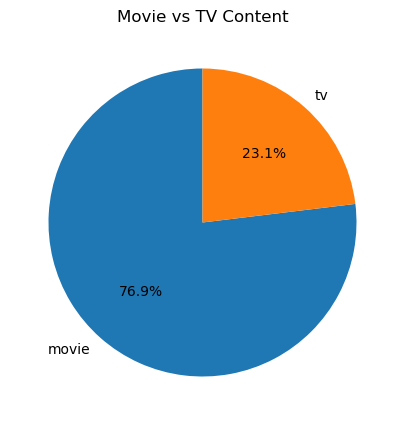

In [44]:
### 1. type (영화/TV 비율)
type_counts = df['type'].value_counts()
plt.figure(figsize=(5,5))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Movie vs TV Content')
plt.ylabel('')
plt.show()

## 개봉연도 분포

In [45]:
### 2. release_date (개봉 연도 분포)
# df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
# plt.figure(figsize=(10,5))
# sns.histplot(df['release_year'].dropna(), bins=20, kde=False)
# plt.title('Distribution of Release Year')
# plt.xlabel('Release Year')
# plt.ylabel('Count')
# plt.show()

## 상영시간 분포

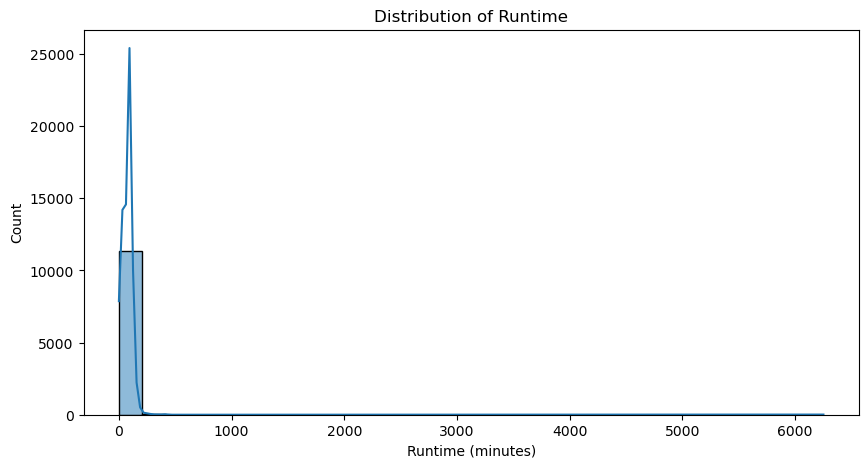

In [46]:
### 3. runtime (상영시간 분포)
plt.figure(figsize=(10,5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()

## 장르분포

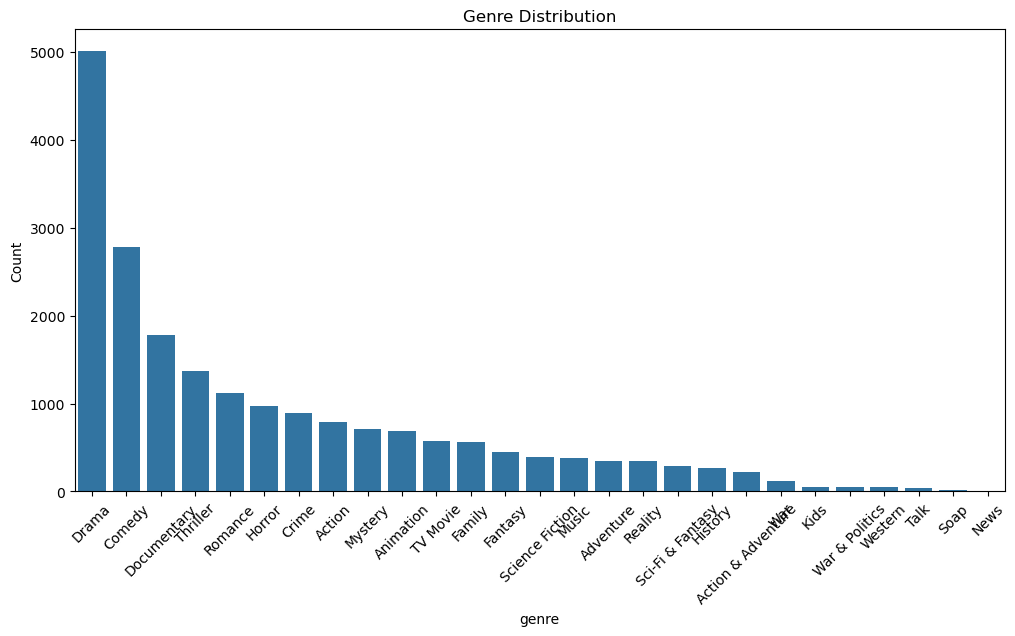

In [47]:
genre_series = df['genre'].dropna().str.split(', ')
genre_list = genre_series.explode()
genre_counts = genre_list.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## country 분포

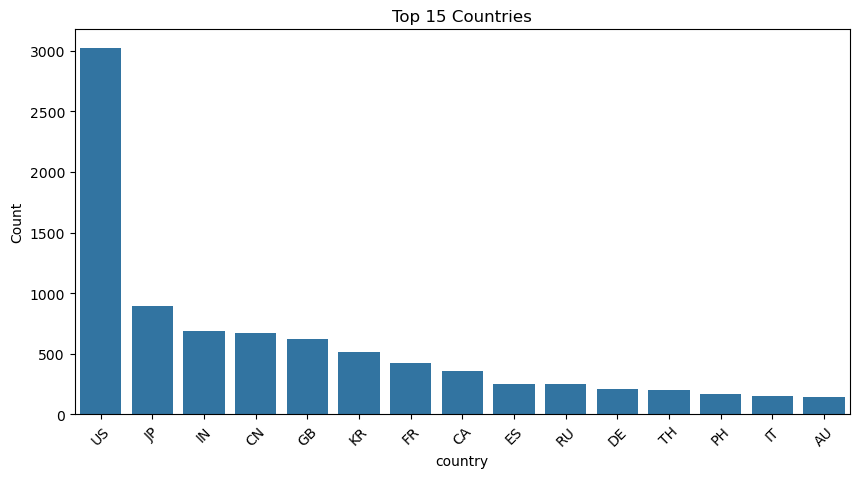

In [48]:
country_counts = df['country'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 15 Countries')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## language 분포

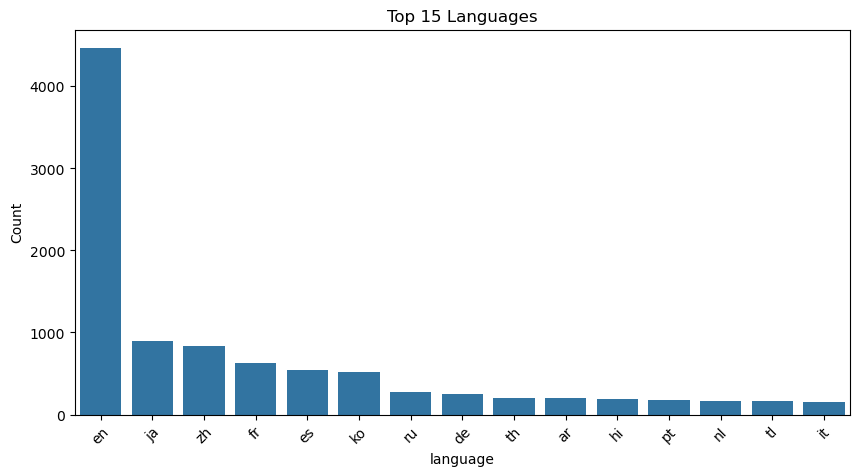

In [49]:
language_counts = df['language'].value_counts().head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Top 15 Languages')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## imdb rating 분포

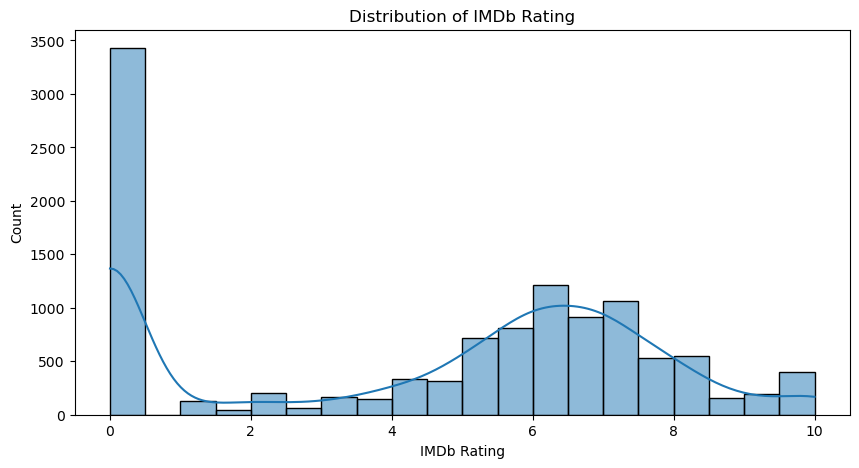

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

## imdb_rating vs imdb_review_count

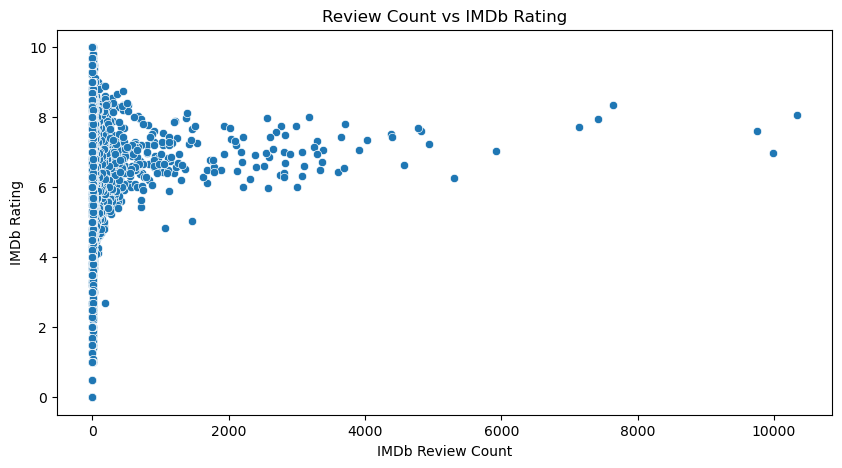

In [51]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='imdb_review_count', y='imdb_rating', data=df)
plt.title('Review Count vs IMDb Rating')
plt.xlabel('IMDb Review Count')
plt.ylabel('IMDb Rating')
plt.show()

## runtime vs imdb_rating

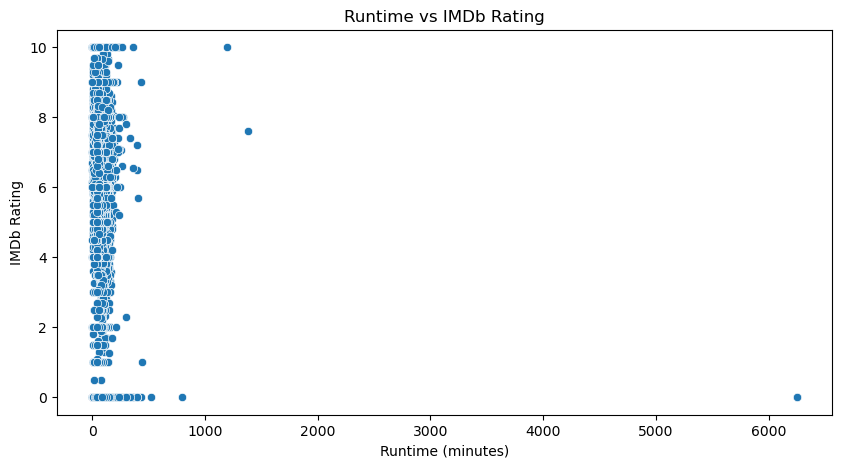

In [52]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='runtime', y='imdb_rating', data=df)
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

## 장르별 평점

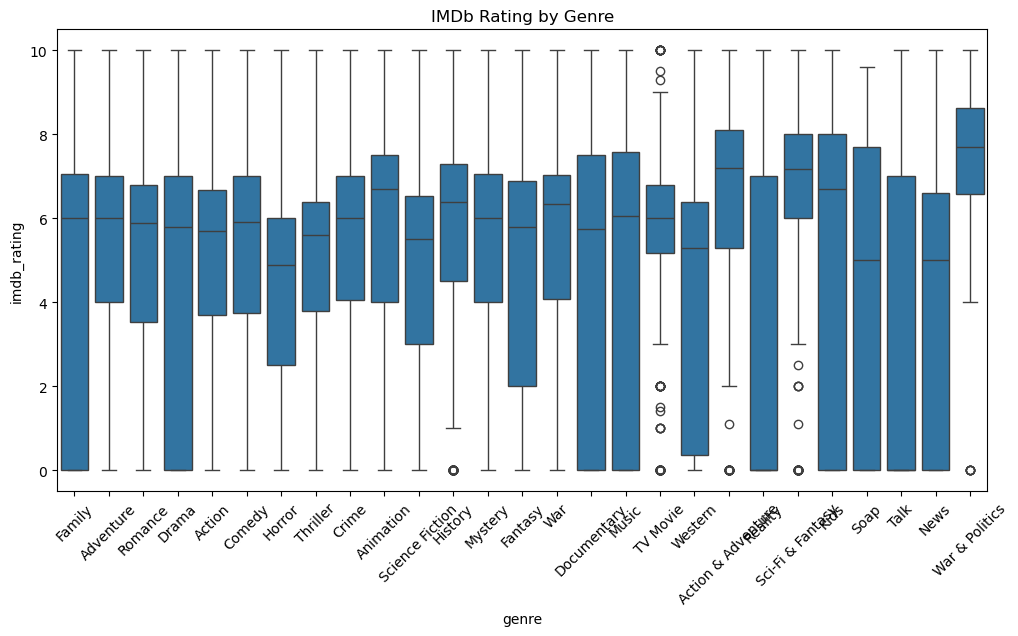

In [53]:
genre_rating = pd.concat([genre_series, df['imdb_rating']], axis=1).explode('genre')
genre_rating = genre_rating.dropna()
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='imdb_rating', data=genre_rating)
plt.title('IMDb Rating by Genre')
plt.xticks(rotation=45)
plt.show()

## 나라별 장르 분포도

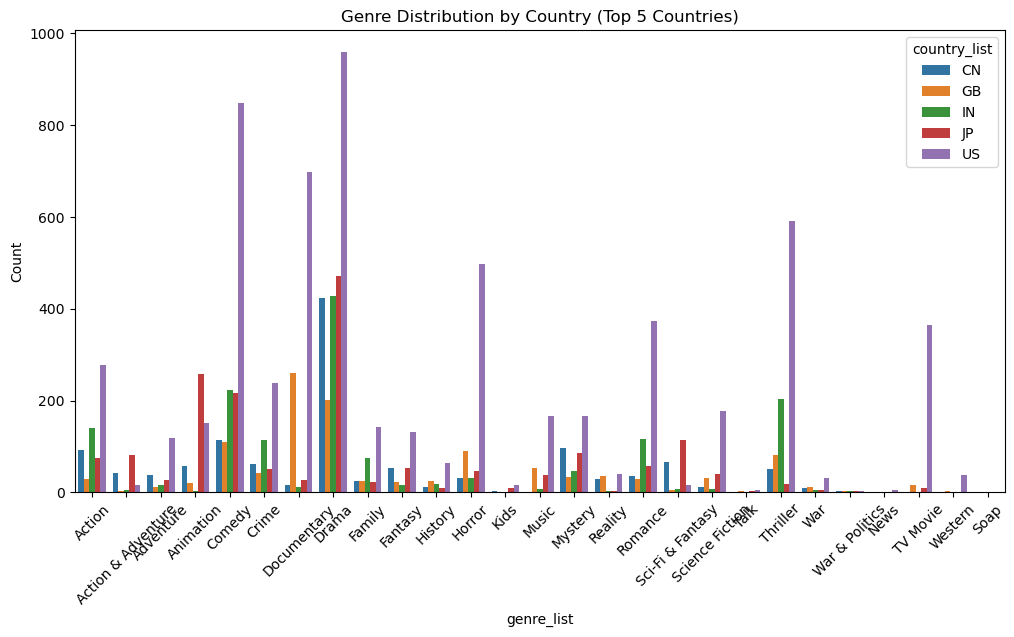

In [54]:
df_country_genre = df.copy()
df_country_genre['country_list'] = df_country_genre['country'].str.split(', ')
df_country_genre = df_country_genre.explode('country_list')
df_country_genre['genre_list'] = df_country_genre['genre'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_list')

country_genre_counts = df_country_genre.groupby(['country_list', 'genre_list']).size().reset_index(name='count')
top_countries = df_country_genre['country_list'].value_counts().head(5).index
filtered = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='count', hue='country_list', data=filtered)
plt.title('Genre Distribution by Country (Top 5 Countries)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## 평점 신뢰도 분석

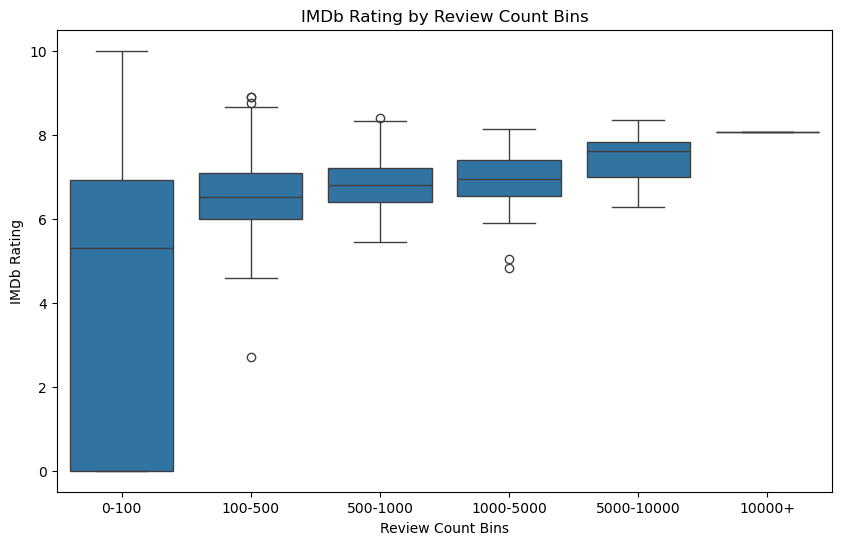

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/2791718114.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='director', data=director_top, palette='viridis')


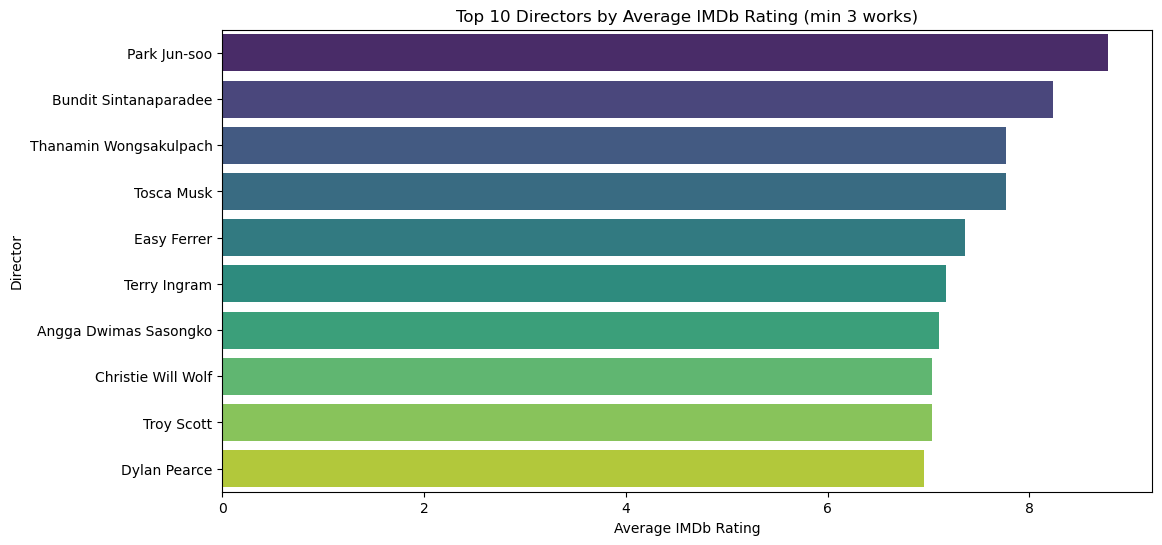

In [55]:
bins = [0, 100, 500, 1000, 5000, 10000, 50000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['review_bin'] = pd.cut(df['imdb_review_count'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10,6))
sns.boxplot(x='review_bin', y='imdb_rating', data=df)
plt.title('IMDb Rating by Review Count Bins')
plt.xlabel('Review Count Bins')
plt.ylabel('IMDb Rating')
plt.show()

### 추가 심화 분석 ③ 감독별 평균 평점
# 감독 집계
director_avg = df.groupby('director')['imdb_rating'].agg(['count', 'mean']).reset_index()
director_top = director_avg[director_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='director', data=director_top, palette='viridis')
plt.title('Top 10 Directors by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.show()

## 배우별 평균 평점(작품 3개이상인 배우)

/var/folders/gd/kdlq8js55wdg60tg67427vvc0000gn/T/ipykernel_10057/3351837532.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')


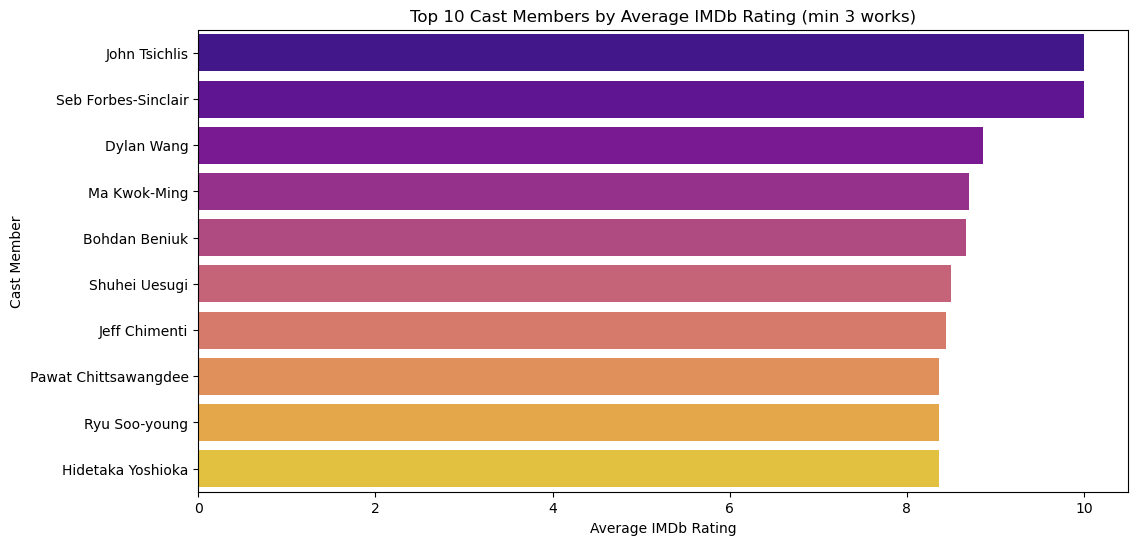

In [56]:
df['cast_list'] = df['cast'].str.split(', ')
df_cast = df.explode('cast_list')

cast_avg = df_cast.groupby('cast_list')['imdb_rating'].agg(['count', 'mean']).reset_index()
cast_top = cast_avg[cast_avg['count'] >= 3].sort_values(by='mean', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='mean', y='cast_list', data=cast_top, palette='plasma')
plt.title('Top 10 Cast Members by Average IMDb Rating (min 3 works)')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Cast Member')
plt.show()

## 개봉 (월) 분석

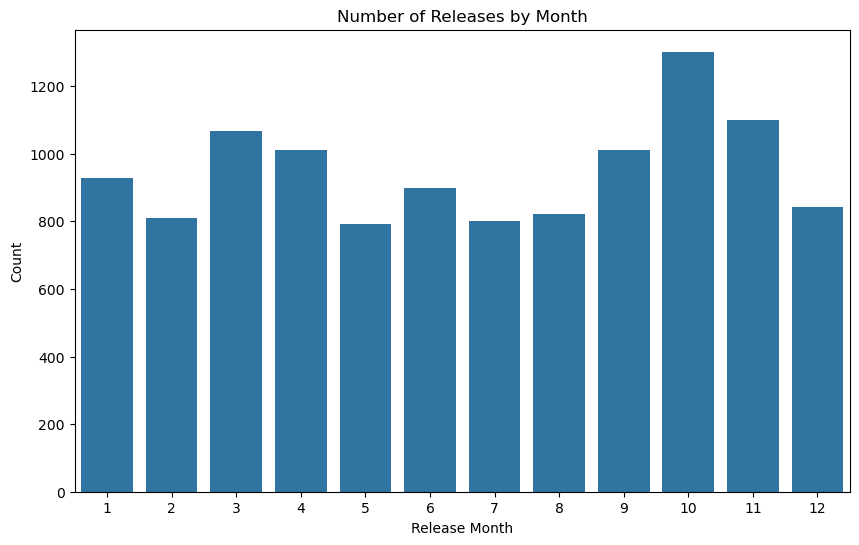

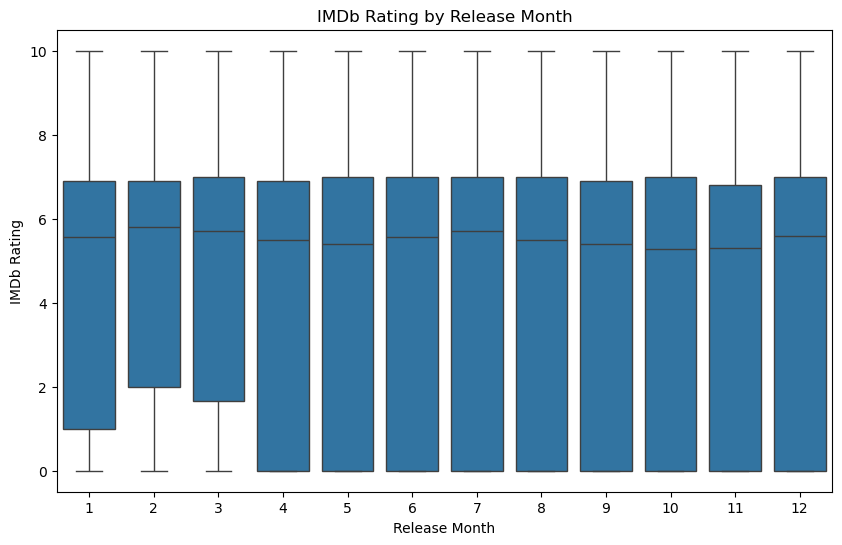

In [57]:
### 추가 심화 분석 ⑤ 개봉 월(month) 분석
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='release_month', data=df)
plt.title('Number of Releases by Month')
plt.xlabel('Release Month')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='release_month', y='imdb_rating', data=df)
plt.title('IMDb Rating by Release Month')
plt.xlabel('Release Month')
plt.ylabel('IMDb Rating')
plt.show()